<b> DATA SCIENTIST TEST CASE </b>

oleh : Handri Mauludin Maulana

Banyak sekali metode yang dapat digunakan untuk memperoleh data. Salah satunya adalah dengan menggunakan package <i>
forex-python </i>. Data yang akan diambil merupakan data nilai tukar mata uang IDR per 1 USD dalam kurun waktu 08 Mei 2020
hingga 08 Mei 2021. Metode ini adalah metode yang efektif untuk mengambil data <i> currency exchange rates </i>. Hal ini karena
metode yang digunakan hanya memasukan tanggal awal dan tanggal akhir yang akan diambil datanya.   

In [52]:
#Mengambil nilai IDR dalam 1 USD pada tanggal 08 Mei 2020 hingga 08 Mei 2021
#Pada tahapan ini, data yang diambil melalui iterasi memerlukan waktu beberapa menit dan koneksi internet
import pandas as pd
from datetime import timedelta, date
from forex_python.converter import get_rate

def daterange(tanggal_mulai, tanggal_akhir):
    for n in range(int((tanggal_akhir - tanggal_mulai).days)):
        yield tanggal_mulai + timedelta(n)
tanggal = []
idr = []
tanggal_mulai = date(2020, 5, 8)
tanggal_akhir = date(2021, 5, 9)
for tanggal_ke in daterange(tanggal_mulai, tanggal_akhir):
    date = tanggal_ke.strftime("%Y-%m-%d")
    tanggal.append(date)
    rate = get_rate("USD", "IDR", tanggal_ke)
    idr.append(rate)
column = ['DATETIME']
future = pd.DataFrame(tanggal, columns=column)
col = ['IDR']
nilai_idr = pd.DataFrame(idr, columns=col)
df = pd.concat([future, nilai_idr], axis=1).reindex(future.index)

In [53]:
#Melihat data yang telah dibentuk menjadi dataframe bernama df
print(df.head())

     DATETIME           IDR
0  2020-05-08  14967.499769
1  2020-05-09  14967.499769
2  2020-05-10  14967.499769
3  2020-05-11  14968.883962
4  2020-05-12  14803.499724


In [54]:
#Melihat ukuran dataset, terdapat 2 kolom dengan 366 baris
print(df.shape)
#Kolom tersebut terdiri dari variabel IDR dan DATETIME
print(df.columns)

(366, 2)
Index(['DATETIME', 'IDR'], dtype='object')


In [55]:
#Melihat statistik deskriptif dari dataset
print("Summary statistik dataset")
print(df.describe())
print("")
print("Tanggal nilai IDR minimum")
print(df[df["IDR"] == df["IDR"].min()])
print("")
print("Tanggal nilai IDR maksimum")
print(df[df["IDR"] == df["IDR"].max()])

Summary statistik dataset
                IDR
count    366.000000
mean   14434.461766
std      293.247909
min    13876.602147
25%    14162.802393
50%    14425.001015
75%    14695.003500
max    14992.922220

Tanggal nilai IDR minimum
       DATETIME           IDR
241  2021-01-04  13876.602147

Tanggal nilai IDR maksimum
       DATETIME          IDR
126  2020-09-11  14992.92222
127  2020-09-12  14992.92222
128  2020-09-13  14992.92222


<b> EXPLORATORY DATA ANALYS </b>

In [56]:
#Memecah data DATETIME ke dalam data masing-masing Tahun, Bulan, dan Tanggal
df[["Tahun", "Bulan", "Tanggal"]] = df["DATETIME"].str.split('-', expand=True)

In [57]:
#Mencari nilai rata-rata IDR setiap bulannya
IDR_mean = df.groupby(["Tahun","Bulan"])["IDR"].mean().to_frame()
print(IDR_mean)

                      IDR
Tahun Bulan              
2020  05     14821.808034
      06     14194.238450
      07     14540.758792
      08     14712.044169
      09     14833.720964
      10     14734.439556
      11     14222.450619
      12     14154.736541
2021  01     14058.484036
      02     14068.882762
      03     14401.280600
      04     14539.731615
      05     14375.324039


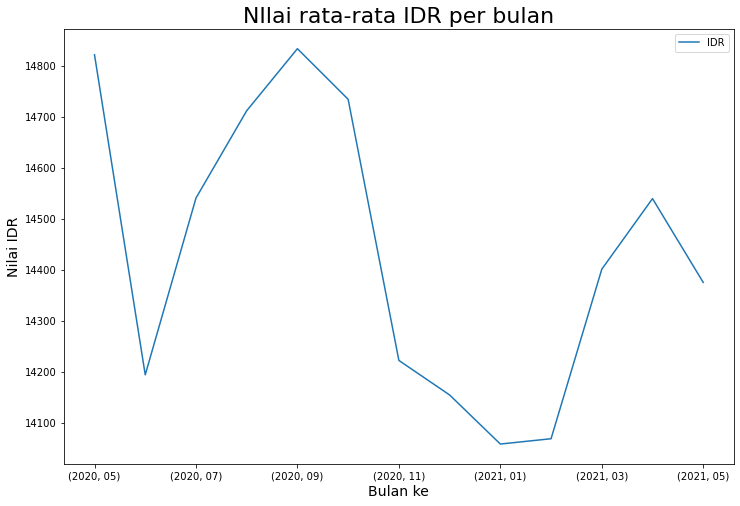

In [58]:
#Memvisualisasikan data nilai rata-rata IDR terhadap setiap bulannya
import matplotlib.pyplot as plt
IDR_mean.plot(figsize=(12,8))
plt.xlabel("Bulan ke", fontsize=14)
plt.ylabel("Nilai IDR", fontsize=14)
plt.title("NIlai rata-rata IDR per bulan", fontsize=22)
plt.show()

Dari summary dataset yang diperoleh secara statistik, nilai IDR paling rendah berada di kisaran Rp. 13876.602147 yang terjadi
pada tanggal 04 Januari 2021, sementara nilai IDR paling tinggi berada di kisaran Rp. 14992.9222 yang terjadi pada tanggal
11 September 2020 - 13 September 2020. Sementara secara rata - rata, nilai IDR berkisar Rp. 14434.461766 dengan simpangan bakunya Rp. 293.247909. Adapun per-bulannya, nilai IDR secara umum dapat dilihat secara jelas melalui grafik tren nilai rata-rata IDR per bulan. Dimana grafik tersebut menunjukkan pergerakan nilai IDR setiap bulannya.

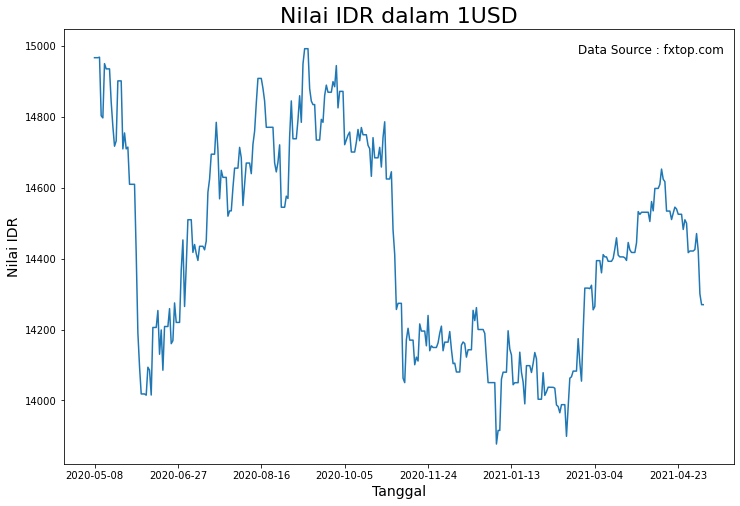

In [9]:
#Melihat persebaran tren data melalui grafik
import matplotlib.pyplot as plt
df.set_index("DATETIME", inplace=True)
df["IDR"].plot(figsize=(12,8))
plt.title("Nilai IDR dalam 1USD", fontsize=22)
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Nilai IDR", fontsize=14)
plt.text(290, 14980, "Data Source : fxtop.com", fontsize=12)
plt.show()

Berdasarkan grafik yang telah dibuat melalui visualisasi data, tren nilai IDR mengalamai fluktuasi dari waktu ke waktu.
Secara umum, nilai IDR cenderung membaik pada kisaran awal bulan Mei 2020, namun kembali cenderung memburuk hingga kisaran
bulan November 2020 atau pertengahan quartal empat. Hal tersebut terjadi karena perekonomian Indonesia sedang tidak stabil
akibat imbasnya efek pandemi yang berkepanjangan. Akan tetapi, nilai IDR kembali menguat dari November 2020 hingga awal bulan
Maret 2021, yang mana Nilai IDR sempat tembus Rp. 13876.602147 per 1 USD pada tanggal 04 Januari 2021. Tentunya hal ini menjadi kabar baik bagi perekonomian Indonesia di awal tahun  2021 quartal pertama. Ada beberapa faktor yang memicu nilai IDR kembali menguat, salah satu diantaranya adalah ditemukannya vaksin covid-19. Sementara, pada kisaran awal tahun quartal kedua, nilai IDR kembali melemah, disusulnya dengan lonjakan kasus pandemi di berbagai belahan negara seperti India, negara bagian Eropa dan Amerika, yang tentunya dapat mengganggu perekonomian global termasuk perekonomian Indonesia itu sendiri.

<b>F O R E C A S T</b>

Forecasting merupakan salah satu bagian dari machine learning untuk memprediksi nilai, angka di masa depan atau masa yang
akan datang. Banyak metode yang dibisa diterapkan dalam forecasting, diantaranya berupa menggunakan regresi linear, kuadrat
terkecil, inversi, algoritma regresi seperti fbprophet, polynomialregression, moving average dan sebagainya. Pada studi kasus kali ini, data yang diolah merupakan data time series sehingga metode yang digunakan menggunakan algoritma fbprophet. Algoritma fbprophet sendiri merupakan algoritma yang dibuat oleh Facebook untuk memprediksi atau peramalan bisnis di masa depan dengan melihat kejadian-kejadian sebelumnya. Dengan melihat pola/tren kejadian sebelumnya, maka nilai di masa depan dapat diramalkan. Akan tetapi, tidak menutup kemungkinan pada studi kasus ini akan dicoba metode forecasting lainnya seperti menggunakan metode polinomialregression. Model yang didapat nantinya akan bandingkannya satu sama lain, sehingga memperoleh model yang terbaik untuk memprediksi nilai atau angka di masa depan.

<b> METODE 1 -  ALGORTIMA FBPROPHET </b>

In [59]:
#Import package fbprophet
from fbprophet import Prophet
model = Prophet(interval_width=0.8)

In [60]:
#Mengubah kolom DATETIME dan IDR ke format fbprophet, yaitu ds dan y
df = df.reset_index()
df = df.rename(columns={'DATETIME' : 'ds', 'IDR': 'y'})

In [61]:
#Fitting model prophet ke data nilai IDR
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
#Membuat tanggal prediksi satu minggu ke depan yaitu tanggal 09 Mei 2021 hinggal tanggal 15 Mei 2021
from datetime import timedelta, date

def daterange(tanggal_mulai, tanggal_akhir):
    for n in range(int((tanggal_akhir - tanggal_mulai).days)):
        yield tanggal_mulai + timedelta(n)
tanggal = []
tanggal_mulai = date(2021, 5, 9)
tanggal_akhir = date(2021, 5, 16)
for single_date in daterange(tanggal_mulai, tanggal_akhir):
    date = single_date.strftime("%Y-%m-%d")
    tanggal.append(date)
column = ['ds']
future = pd.DataFrame(tanggal, columns=column)

In [17]:
#Memprediksi nilai IDR satu minggu ke depan
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-05-09,14600.391857,14473.147824,14732.302078
1,2021-05-10,14599.133156,14465.398763,14717.573838
2,2021-05-11,14594.928822,14470.377160,14720.432782
3,2021-05-12,14590.980286,14469.439629,14711.613986
4,2021-05-13,14606.393938,14486.659349,14736.110637
5,2021-05-14,14614.235621,14482.218855,14744.919657
6,2021-05-15,14619.980653,14488.168371,14750.210844


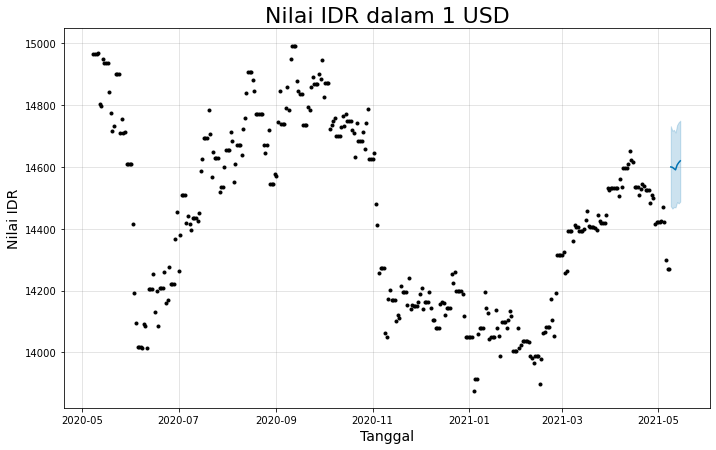

In [63]:
#Visualisasi data prediksi nilai IDR 
nilai_IDR_pred = model.plot(forecast)
plt.title("Nilai IDR dalam 1 USD", fontsize=22)
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Nilai IDR", fontsize=14)
plt.show()

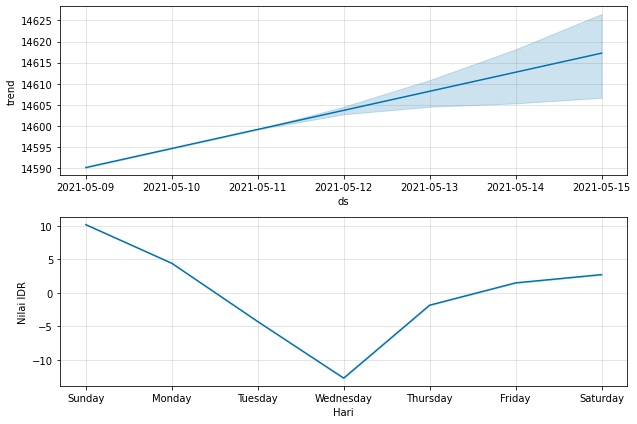

In [19]:
nilai_IDR_pred_komponen = model.plot_components(forecast)
plt.xlabel("Hari")
plt.ylabel("Nilai IDR")
plt.show()

Setelah melakukan fitting model ke dalam dataset dan melakukan prediksi nilai untuk satu minggu ke depan. Data hasil
prediksi divisualisasikan ke dalam bentuk grafik agar mudah dianalisis. Melalui grafik, dapat dilihat tren untuk satu minggu
ke depan. Secara umum nilai IDR akan mengalami penurunan terlebih dahulu lalu nilai IDR akan mengalami kenaikan atau dengan kata lain nilai IDR akan menguat terlebih dahulu lalu akan melemah. Dimana nilai IDR tersebut diprediksi akan mengalami kenaikan tertinggi sebesar Rp. 14619.980653 pada tanggal 15 Mei 2021, dan terkecil Rp. 14590.980286 pada tanggal 12 Mei 2021, atau dapat dilihat melalui melihat persebaran forecast yang telah dilampirkan diatas ataupun melalui grafik pertama "Nilai IDR dalam 1 USD" diatas, yang ditandai dengan garis berwarna biru. Pada forecast <i> yhat </i> merupakan nilai rata-rata prediksi, <i> yhat_lower </i> merupakan nilai prediksi terrendah, dan <i> yhat_upper </i> merupakan nilai prediksi terbesar.

<b> METODE 2 - REGRESI LINEAR </b>

Metode ini merupakan salah satu metode yang ada dalam algoritma machine learning berupa regresi. Algoritma yang ada dalam
regresi merupakan algortima yang dapat memprediksi suatu nilai atau angka dengan melihat pola/tren data sebelumnya. Model yang akan digunakan adalah model polinomial dengan orde 5 hingga 7 derajat.

In [20]:
#Melatih data menggunakan metode machine learning menggunakan package skit-learn
from sklearn.model_selection import train_test_split
hari_ke = []
for i in range(1,367,1):
    hari_ke.append(i)
column = ['hari_ke']
X = pd.DataFrame(hari_ke, columns=column)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, random_state=0)

In [21]:
#Membuat model polinomial berorde derajat 5
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
derajat=5
polyreg5=make_pipeline(PolynomialFeatures(derajat),LinearRegression())
polyreg5.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [22]:
#Membuat model polinomial berorde derajat 6
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
derajat=6
polyreg6=make_pipeline(PolynomialFeatures(derajat),LinearRegression())
polyreg6.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [23]:
#Membuat model polinomial berorde derajat 7
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
derajat=7
polyreg7=make_pipeline(PolynomialFeatures(derajat),LinearRegression())
polyreg7.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

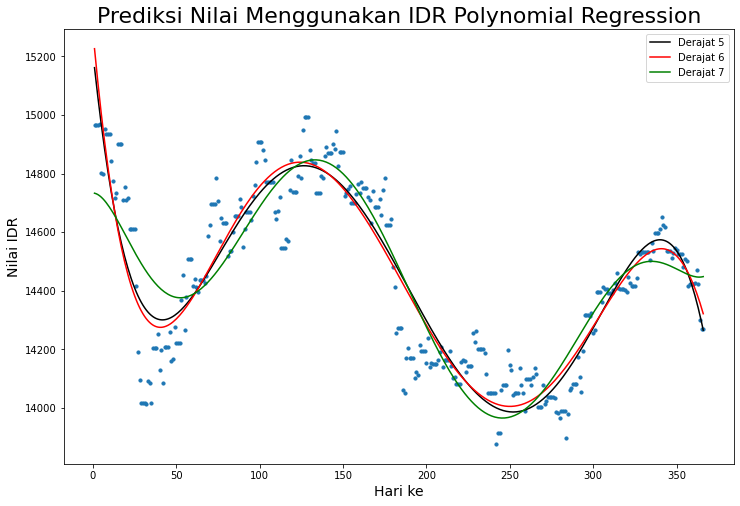

In [24]:
#Visualisasi model polinomial berorde 5 hingga 7
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(X,y, s=10)
plt.plot(X,polyreg5.predict(X),color="black", label="Derajat 5")
plt.plot(X,polyreg6.predict(X),color="red", label="Derajat 6")
plt.plot(X,polyreg7.predict(X),color="green", label="Derajat 7")
plt.title("Prediksi Nilai Menggunakan IDR Polynomial Regression", fontsize=22)
plt.xlabel("Hari ke", fontsize=14)
plt.ylabel("Nilai IDR", fontsize=14)
plt.legend()
plt.show()

In [25]:
#Membandingkan nilai error pada setiap model
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred5 = polyreg5.predict(X_test)
y_pred6 = polyreg6.predict(X_test)
y_pred7 = polyreg7.predict(X_test)
mae5 = mean_squared_error(y_test, y_pred5)
mae6 = mean_squared_error(y_test, y_pred6)
mae7 = mean_squared_error(y_test, y_pred7)
rmse5 = np.sqrt(mae5)
rmse6 = np.sqrt(mae6)
rmse7 = np.sqrt(mae7)
print("Error Derajat 5 :", rmse5)
print("Error Derajat 6 :", rmse6)
print("Error Derajat 7 :", rmse7)

Error Derajat 5 : 116.89415092504868
Error Derajat 6 : 116.39519314336579
Error Derajat 7 : 136.15705227794822


Dari hasil model yang telah dibuat menggunakan polinomial regressi, model dengan derajat enam merupakan model yang efektif untuk memodelkan grafik nilai IDR per 1 USD dalam rentang kurun waktu 08 Mei 2020 hingga 08 Mei 2021. Hal ini karena nilai <i>
root mean squared error </i> kecil apabila dibandingkan dengan model berderajat lainnya. Model berderjat enam ini ditandai
dengan garis yang berwarna merah. Oleh karena itu, untuk memprediksi nilai IDR di masa depan, model yang akan digunakan adalah
model polinomial berderajat enam ini.

In [26]:
#Memprediksi nilai pada hari ke - 367 hingga ke 373 atau pada tanggal 09 Mei 2021 hingga 15 Mei 2021
hari_ke_pred = []
for i in range(367, 374, 1):
    hari_ke_pred.append(i)
column = ['X']
X_hat = pd.DataFrame(hari_ke_pred, columns=column)
y_hat = polyreg6.predict(X_hat)

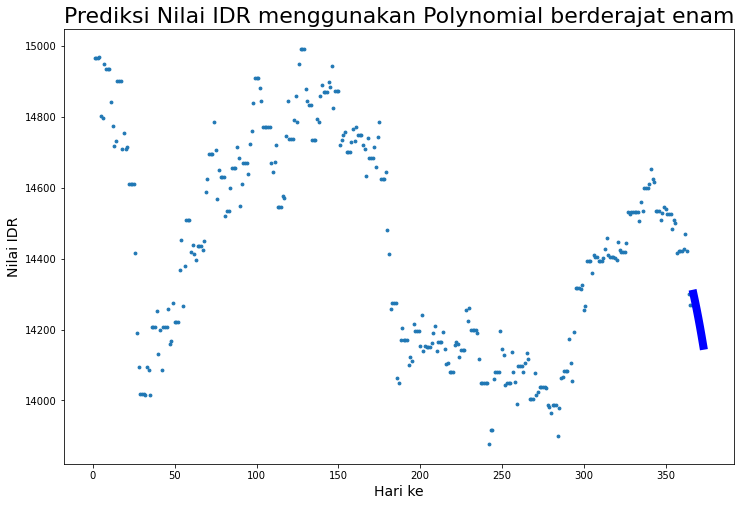

In [27]:
#Visualisasi data hasil prediksi
plt.figure(figsize=(12,8))
plt.scatter(X,y, s=8)
plt.plot(X_hat, y_hat, color="blue", linewidth=8)
plt.title("Prediksi Nilai IDR menggunakan Polynomial berderajat enam", fontsize=22)
plt.xlabel("Hari ke", fontsize=14)
plt.ylabel("Nilai IDR", fontsize=14)
plt.show()

In [28]:
#Melihat persebaran nilai prediksi
column = ["Prediksi nilai IDR"]
y_hat = pd.DataFrame(y_hat, columns=column)
future = future.rename(columns={'ds' : 'Tanggal'})
IDR_pred = pd.concat([future, y_hat], axis=1).reindex(future.index)

In [29]:
print(IDR_pred)

      Tanggal  Prediksi nilai IDR
0  2021-05-09        14301.023442
1  2021-05-10        14279.433445
2  2021-05-11        14256.719385
3  2021-05-12        14232.856558
4  2021-05-13        14207.820044
5  2021-05-14        14181.584709
6  2021-05-15        14154.125202


Setelah melakukan fitting model polinomial berorde derajat enam ke dalam dataset nilai IDR dan melakukan prediksi nilai
untuk satu minggu ke depan atau pada tanggal 09 Mei 2021 hingga 15 Mei 2021. Hasil prediksi yang diperoleh nilai IDR 
secara umum akan mengalami penurunan atau dengan kata lain nilai IDR akan menguat. Dimana nilai IDR prediksi tersebut dapat
dilihat di atas. Hasil menunjukkan nilai IDR terbesar berada pada Rp. 14301.023442 yaitu pada tanggal 09 Mei 2021, sementara nilai IDR terkecil berada pada Rp. 14154.125202 pada tanggal 15 Mei 2021. Atau dengan kata lain, nilai IDR akan terus menguat seiring berjalannya waktu.

<b> A N A L I S I S   -   M O D E L </b>

Pada tahapan ini. Model perlu dievaluasi, baik model hasil dari algoritma fbprophet maupun hasil matematis dari polimoial
berderajat enam ini. Evaluasi dilakukan untuk mengetahui seberapa akurat model yang telah dibuat dengan fakta data yang ada di
lapangan. Oleh karena itu, evaluasi memerlukan data realtime di lapangan yaitu data nilai IDR pada kurun waktu tanggal 09 Mei
2021 hingga tanggal 15 Mei 2021 atau pada tanggal yang diprediksi.

In [31]:
#Mengambil data nilai IDR per 1 USD pada tanggal 09 Mei 2021 hingga 15 Mei 2021
import pandas as pd
from datetime import timedelta, date
from forex_python.converter import get_rate

def daterange_fut(tanggal_mulai_fut, tanggal_akhir_fut):
    for n in range(int((tanggal_akhir_fut - tanggal_mulai_fut).days)):
        yield tanggal_mulai_fut + timedelta(n)

tanggal_fut = []
idr_fut = []
tanggal_mulai_fut = date(2021, 5, 9)
tanggal_akhir_fut = date(2021, 5, 16)
for tanggal_ke_fut in daterange(tanggal_mulai_fut, tanggal_akhir_fut):
    date_fut = tanggal_ke_fut.strftime("%Y-%m-%d")
    tanggal_fut.append(date_fut)
    rate_fut = get_rate("USD", "IDR", tanggal_ke_fut)
    idr_fut.append(rate_fut)
column_fut = ['DATETIME']
tanggal_actual = pd.DataFrame(tanggal_fut, columns=column_fut)
col_fut = ['IDR']
nilai_idr_actual = pd.DataFrame(idr_fut, columns=col_fut)
df_fut = pd.concat([tanggal_actual, nilai_idr_actual], axis=1).reindex(tanggal_actual.index)

In [32]:
#Melihat data nilai IDR per 1 USD pada tanggal 09 Mei 2021 hingga 15 Mei 2021
df_fut

,DATETIME,IDR
0,2021-05-09,14270.146778
1,2021-05-10,14125.449914
2,2021-05-11,14177.649959
3,2021-05-12,14263.153986
4,2021-05-13,14334.748779
5,2021-05-14,14296.749979
6,2021-05-15,14296.749979


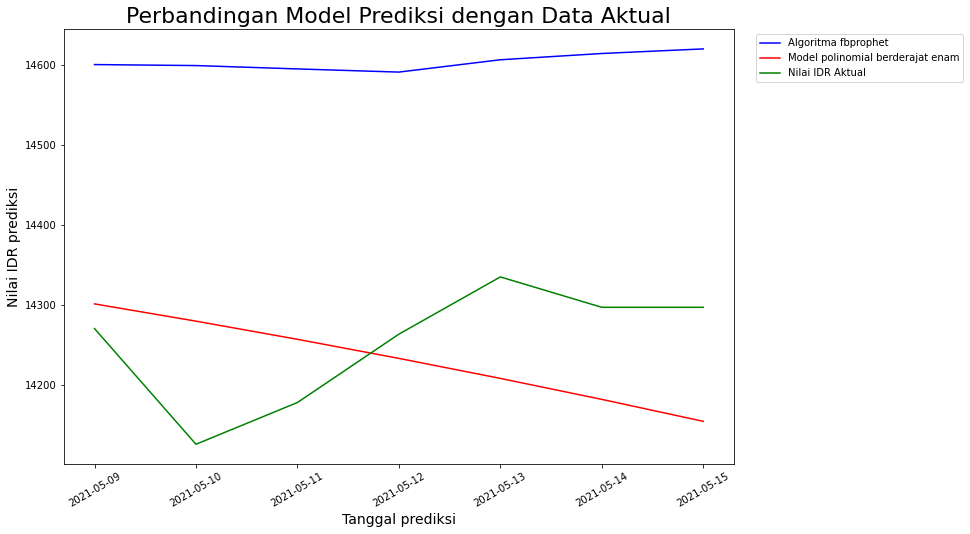

In [42]:
#Membandingkan model algoritma fbprophet dan model polinomal dengan data acktual
plt.figure(figsize=(12,8))
plt.plot(forecast["ds"], forecast["yhat"], color='blue', label='Algoritma fbprophet')
plt.plot(forecast["ds"], y_hat, color='red', label='Model polinomial berderajat enam')
plt.plot(forecast["ds"], df_fut["IDR"], color='green', label='Nilai IDR Aktual')
plt.xlabel("Tanggal prediksi", fontsize=14)
plt.ylabel("Nilai IDR prediksi", fontsize=14)
plt.title("Perbandingan Model Prediksi dengan Data Aktual", fontsize=22)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor =(1.35, 1), ncol = 1)
plt.show()

In [48]:
#Membandingkan nilai error antara model polinomial dengan model fbprophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_pol = mean_squared_error(df_fut["IDR"], y_hat)
mse_fbprophet = mean_squared_error(df_fut["IDR"], forecast["yhat"])
mae_pol = mean_absolute_error(df_fut["IDR"], y_hat)
mae_fbprophet = mean_absolute_error(df_fut["IDR"], forecast["yhat"])
rmse_pol = np.sqrt(mse_pol)
rmse_fbprophet = np.sqrt(mse_fbprophet)
print("Mean Absolute Error model polinomial :", mae_pol)
print("Mean Absolute Error fbprophet :", mae_fbprophet)
print('')
print("Mean Squared Error model polinomial :", mse_pol)
print("Mean Squared Error fbprophet :", mse_fbprophet)   
print('')
print("Root Mean Squared Error model polinomial :", rmse_pol)
print("Root Mean Squared Error fbprophet :", rmse_fbprophet)

Mean Absolute Error model polinomial : 96.99226172052529
Mean Absolute Error fbprophet : 351.62785116549225

Mean Squared Error model polinomial : 11649.996438905506
Mean Squared Error fbprophet : 127727.95025555043

Root Mean Squared Error model polinomial : 107.93514922816156
Root Mean Squared Error fbprophet : 357.3904730900789


Berdasarkan grafik "Perbandingan Model Prediksi dengan Data Aktual", terlihat bahwa garis yang dibentuk oleh model polinomial (garis berwarna merah) hampir berdekatan dengan Nilai IDR aktual (garis berwarna hijau), yang artinya model polinomial memiilki akurasi yang tinggi dan prediksi yang dibuat mendekati dengan data nilai IDR secara aktual. Sementara model yang dibentuk oleh
algoritma fbprophet, nilai IDR prediksi jauh mendekati dengan nilai IDR secara aktual. Apabila melihat nilai error yang dibentuk oleh model polinomial dengan algoritma fbprophet, nilai error pada model polinomial lebih kecil dibandikan dengan nilai error algoritma fbprophet, yang dapat dilihat nilai kesalahan model error tersebut diatas. Akan tetapi, forecasting dengan menggunakan model matematis polinomial memiliki kelemahan tersendiri dibandingkan dengan algortima forecasting yang khusus digunakan untuk memprediksi nilai di masa depan. Kelemahan tersebut diantarannya adalah tidak bisa memprediksi lebih dari waktu yang ditetapkan (misalnya tidak bisa memprediksi lebih dari satu minggu ke depan). Hal ini karena berkaitan dengan sifat model polinomial itu sendiri, dimana model yang dibuat akan cenderung terus monoton (contoh: model yang telah dibuat diatas menggunakan polinomial berorde derajat enam, model tren prediksi cenderung monoton terus bergerak ke arah bawah atau dengan kata lain nilai IDR prediksi cenderung akan terus berkurang dan tidak menutup kemungkinan bisa terjadi nilai minus apabila waktu yang diprediksi melebihi batas waktu lebih dari seminggu).

<b> K E S I M P U L A N <b>

1. Banyak metode forecasting yang dapat dilakukan untuk memprediksi suatu nilai atau angka di masa depan, salah satunya adalah
menggunakan metode regresi, moving average, inversi, algoritma fbprophet, dll. Dimana metode-metode tersebut memiliki 
kekurangan dan kelebihan masing-masing.
2. Model polinomal berorde enam derajat memiliki model terbaik untuk memodelkan nilai IDR pada kurun waktu 09 Mei 2021 hingga
15 Mei 2021 dengan nilai error yang kecil dibandingkan dengan algoritma fbprophet.